In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
df=pd.read_csv("../examples/test-output/phase2-full.dat",skiprows=2)

df.columns=df.columns.str.strip()

In [78]:
df.tail()

,Time,Density,gasTemp,av,point,H,#H,H+,@H,H2,...,HS2,HS2+,HSO2+,H2S2+,H2S2,#H2S2,@H2S2,BULK,SURFACE,E-
189,960100.0,100000.0,303.58,11.644,1,0.00003,2.665510e-30,2.122710e-12,1.000000e-30,0.499858,...,6.189210e-10,8.445080e-18,7.812360e-13,3.032880e-16,8.845760e-12,1.000000e-30,1.000000e-30,1.000000e-30,5.047190e-30,0.000002
190,970100.0,100000.0,303.58,11.644,1,0.00003,2.686850e-30,2.119720e-12,1.000000e-30,0.499858,...,6.118220e-10,8.347750e-18,7.795470e-13,3.002060e-16,8.768500e-12,1.000000e-30,1.000000e-30,1.000000e-30,5.098670e-30,0.000002
191,980100.0,100000.0,303.58,11.644,1,0.00003,2.708200e-30,2.116750e-12,1.000000e-30,0.499858,...,6.048050e-10,8.251640e-18,7.778590e-13,2.971520e-16,8.691940e-12,1.000000e-30,1.000000e-30,1.000000e-30,5.150160e-30,0.000002
192,990100.0,100000.0,303.58,11.644,1,0.00003,2.729550e-30,2.113790e-12,1.000000e-30,0.499857,...,5.978660e-10,8.156700e-18,7.761730e-13,2.941250e-16,8.616040e-12,1.000000e-30,1.000000e-30,1.000000e-30,5.201660e-30,0.000002
193,1000000.0,100000.0,303.58,11.644,1,0.00003,2.750910e-30,2.110860e-12,1.000000e-30,0.499857,...,5.910060e-10,8.062950e-18,7.744900e-13,2.911250e-16,8.540810e-12,1.000000e-30,1.000000e-30,1.000000e-30,5.253160e-30,0.000002


In [79]:
def ice_total(species):
    return df[f"#{species}"].values+df[f"@{species}"].values

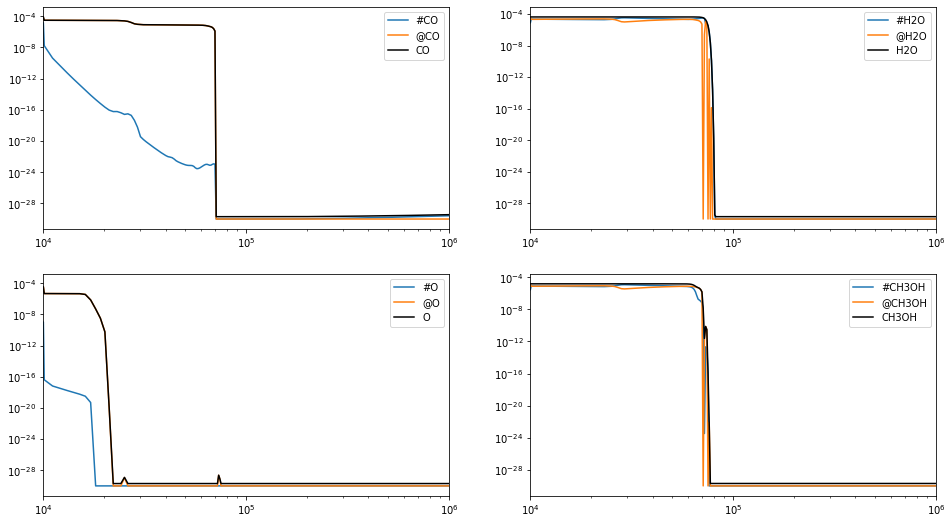

In [80]:
fgi,axes=plt.subplots(2,2,figsize=(16,9))
species=["CO","H2O","O","CH3OH"]
for i,ax in enumerate(axes.flatten()):
    spec=species[i]
    try:
        df[f"#{spec}"]=df[f"#{spec}"].str.replace("+","E+").str.replace("EE","E").astype(float)
    except:
        pass
    try:
        df[f"@{spec}"]=df[f"@{spec}"].str.replace("+","E+").str.replace("EE","E").astype(float)
    except:
        pass
    ax.plot(df["Time"],df[f"#{spec}"],label=f"#{spec}")
    ax.plot(df["Time"],df[f"@{spec}"],label=f"@{spec}")
    ax.plot(df["Time"],ice_total(spec),label=f"{spec}",color="black")
    ax.plot()
    ax.set(yscale="log",xscale="log",xlim=(1e4,1e6))
    ax.legend()

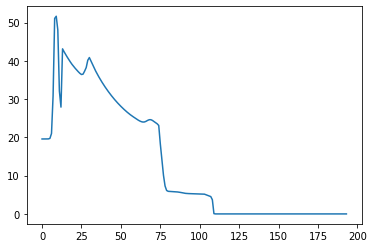

In [76]:
sites_per_grain=1884955.6446075444
gas_to_dust=756764614951.04846

surface_per_grain=df["SURFACE"]*gas_to_dust
surface_layers=surface_per_grain/sites_per_grain

plt.plot(surface_layers)

In [428]:
h2o_be=5600.0
temps=np.arange(0,500,10)
hop=np.exp(-h2o_be/temps)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[None, (1e-30, 1)]

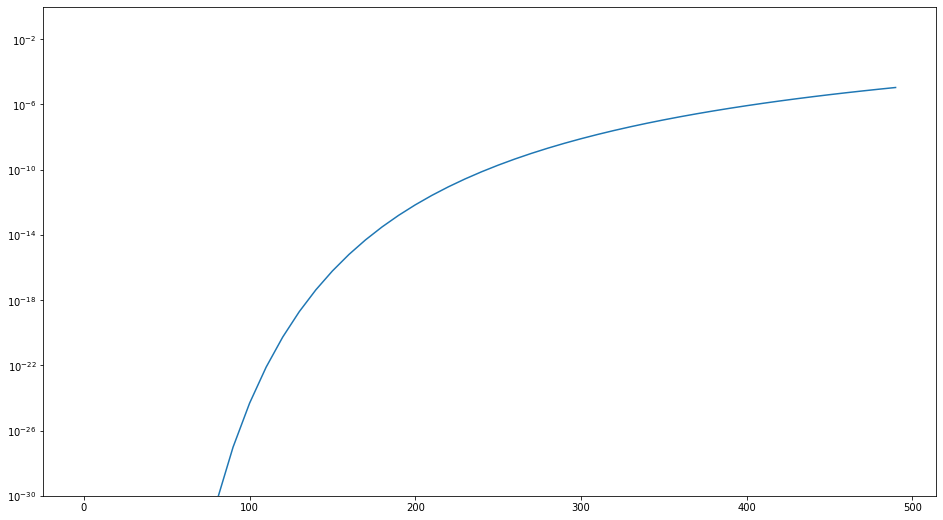

In [422]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(temps,hop)
ax.set(yscale="log",ylim=(1e-30,1))
